# Purpose of this Guide
The Library of Congress has created an API to allow for automated processes to interact with its collections data. The way that we interact with this data is through JSON.

# What is JSON?

JSON (JavaScript Object Notation) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate.

# What skills do you need to navigate it?

* Reading
* Curiosity
* A willingness to try (and maybe mess up and then try again)

# What can you do with it?
Explore, discover, and make cool stuff! Let's look at some examples you can try:

## A look at the trending content
What's the latest on the Library of Congress homepage? We can explore what's happening by asking for the JSON data about the trending content:

In [1]:
import requests #import the library that we use to make the http request
# To get the JSON data add '?fo=json' to the end of the URL.
# the 'at=trending_content' part says only get me the json about the trending content. 
# If you leave that off you will get lots more information
r = requests.get("https://www.loc.gov/?fo=json&at=trending_content")
r.json() #print out the results:


{'trending_content': [{'image': '/portals/static/home/images/trending/t-hispanic-heritage.jpg',
   'link': 'http://hispanicheritagemonth.gov/',
   'portal': 'Heritage',
   'title': 'National Hispanic Heritage Month: Sept. 15 - Oct. 15'},
  {'image': '/portals/static/home/images/trending/vhp-obrien.jpg',
   'link': 'http://memory.loc.gov/diglib/vhp/story/loc.natlib.afc2001001.31937/',
   'portal': 'Veterans History',
   'title': 'Tim O\'Brien: "Vietnam made me really need to write..."'},
  {'image': '/portals/static/home/images/trending/congress/eg-trending-members.jpg',
   'link': 'https://www.congress.gov/members',
   'portal': 'U.S. Legislation',
   'title': 'Find Current Members of Congress on Congress.gov'},
  {'image': '/portals/static/home/images/trending/t-esperanzaspalding.jpg',
   'link': '/item/prn-17-114/',
   'portal': 'Free Concerts',
   'title': 'New Season Includes Rebecca Saunders & Esperanza Spalding'},
  {'image': '/portals/static/home/images/trending/t-hispaniclitera

## Ok so I got some text that looks like gibberish, now what? 
Now we can use a bit of Python to do cool stuff with it! Want to see all of the titles of the Library of Congress collections? Sure, let's try it!

In [2]:
collections_json = requests.get("https://www.loc.gov/collections/?fo=json").json()

for collection in collections_json["results"]:
    print(collection["title"])

Aaron Copland Collection
Abdul Hamid II Collection
Abraham Lincoln Papers at the Library of Congress
Afghanistan Web Archive
African American Perspectives: Pamphlets from the Daniel A. P. Murray Collection, 1818-1907
African American Photographs Assembled for 1900 Paris Exposition
African-American Band Music & Recordings, 1883-1923
After the Day of Infamy: "Man-on-the-Street" Interviews Following the Attack on Pearl Harbor
Alan Lomax Collection
Alan Lomax Collection of Michigan and Wisconsin Recordings
Albert Schatz Collection
Alexander Graham Bell Family Papers at the Library of Congress
Alexander Hamilton Papers
Alexander Hamilton Stephens Papers
The Alfred Whital Stern Collection of Lincolniana
Amazing Grace
America at Work, America at Leisure: Motion Pictures from 1894-1915
America Singing: Nineteenth-Century Song Sheets
An American Ballroom Companion: Dance Instruction Manuals, ca. 1490-1920
American Choral Music
American Colony in Jerusalem, 1870-2006
American English Dialect Rec

## Why does it stop after 40?
You might be thinking "there must be colletions after "B"... and you're correct. 
If we were to give you the data for all our collections it would take a really long time to return the information. So instead we break it into pages. The _pagination_ section of the json contains the information that you need to really get everything (this list is going to be LONG!):

In [3]:
collections_json = requests.get("https://www.loc.gov/collections/?fo=json").json()

while True: #As long as we have a next page, go and fetch it
    for collection in collections_json["results"]: 
        print(collection["title"]) #print out the collection's title
    next_page = collections_json["pagination"]["next"] #get the next page url
    if next_page is not None: #make sure we haven't hit the end of the pages
        collections_json = requests.get(next_page).json()
    else:
        break #we are done and can stop looping


Aaron Copland Collection
Abdul Hamid II Collection
Abraham Lincoln Papers at the Library of Congress
Afghanistan Web Archive
African American Perspectives: Pamphlets from the Daniel A. P. Murray Collection, 1818-1907
African American Photographs Assembled for 1900 Paris Exposition
African-American Band Music & Recordings, 1883-1923
After the Day of Infamy: "Man-on-the-Street" Interviews Following the Attack on Pearl Harbor
Alan Lomax Collection
Alan Lomax Collection of Michigan and Wisconsin Recordings
Albert Schatz Collection
Alexander Graham Bell Family Papers at the Library of Congress
Alexander Hamilton Papers
Alexander Hamilton Stephens Papers
The Alfred Whital Stern Collection of Lincolniana
Amazing Grace
America at Work, America at Leisure: Motion Pictures from 1894-1915
America Singing: Nineteenth-Century Song Sheets
An American Ballroom Companion: Dance Instruction Manuals, ca. 1490-1920
American Choral Music
American Colony in Jerusalem, 1870-2006
American English Dialect Rec

Occupational Folklife Project
Omaha Indian Music
Origins of American Animation
Panoramic Maps
Panoramic Photographs
Papal Transition 2005 Web Archive
Patriotic Melodies
PH Filing Series Photographs
Philip Henry Sheridan Papers
Philippine General Election 2010 Web Archive
Phillips/Mathée Collection
Photochrom Prints
Pioneering the Upper Midwest: Books from Michigan, Minnesota, and Wisconsin, ca. 1820-1910
Polish Declarations of Admiration and Friendship for the United States, 1926
Popular Graphic Arts
Posters: Artist Posters
Posters: Performing Arts Posters
Posters: Spanish Civil War Posters
Posters: World War I Posters
Posters: WPA Posters
Posters: Yanker Poster Collection
Prairie Settlement: Nebraska Photographs and Family Letters, 1862-1912
Pre-1700 Musical Treasures: Manuscript and Print Collection
Printed Ephemera: Three Centuries of Broadsides and Other Printed Ephemera
Prokudin-Gorskii Collection
Prosperity and Thrift: The Coolidge Era and the Consumer Economy, 1921-1929
Public P

## Looking more closely at Collections
We hear you saying "Ohh cool, you have World War I Sheet Music! "
Yes we do! Let's grab the titles and the front covers:

The  coal miner's battle, war or peace


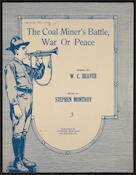

Sammy and Fritzie, or, America's watch on the Rhein song : combination one step - fox trot


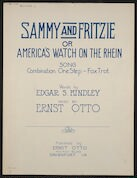

Sailor's life


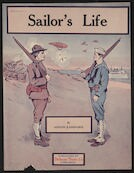

For the boys who did not return


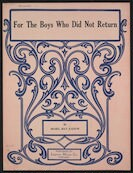

The  parting sailor boy's vow


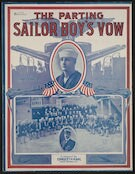

God speed the day we get the Kaiser's goat


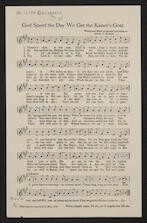

On to Berlin spirit of 1918


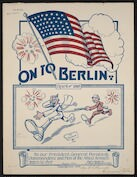

Hats off to U.S.A


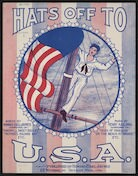

Hats off to U.S.A


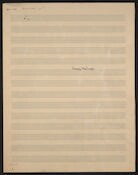

Now he is over


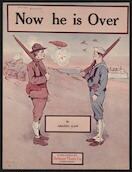

Kaiser Bill, world's assassin


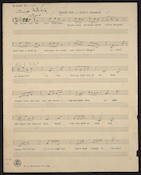

America, the greatest of them all


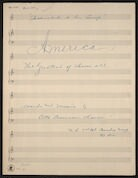

Good bye my boy we're proud to see you go


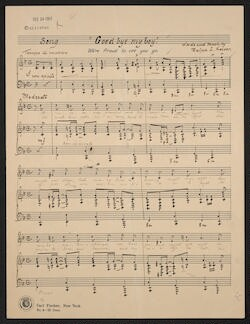

Ev-ry-bod-y takes you by the hand in home sweet home


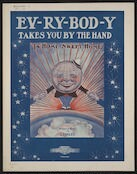

Arise! ye stalwart sons


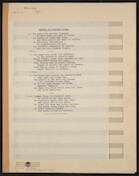

When I come back to you op. 75, no. 1


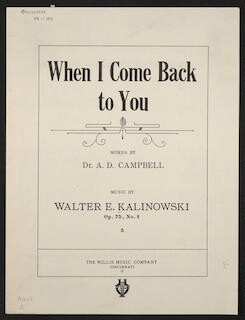

Since my boy has gone away


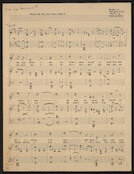

The  Irish Kaiser


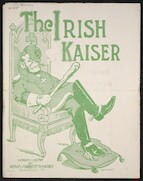

Safe for democracy New America


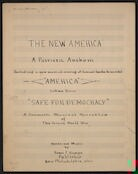

Safe for democracy Take your pen and sign the peace


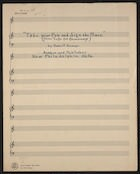

Safe for democracy When my boy comes marching home


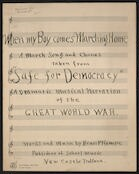

Lullaby of war while your daddy's far away


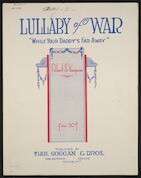

Welcome home to our soldier boys


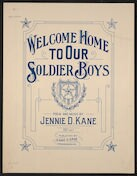

There is no place like home dear in the good old U.S.A


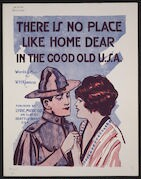

The  working man


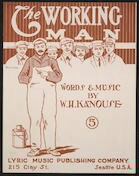

In [4]:
from IPython.display import Image, display #tell python that we want to reuse some code to display the images for us

wwi_sheet_music = requests.get("https://www.loc.gov/collections/world-war-i-sheet-music/?fo=json").json() #get the JSON data
for item in wwi_sheet_music["results"]:
    print(item["title"]) #print out the title
    display(Image("http:" + item["image_url"][0], format="jpeg")) #display the front cover art


## Asking another question
You noticed that the sheet music covers sometimes include publishers. You wonder if you can get more details about that. Yes, you can!
Much of the sheet music was published by multiple organizations or people and around the country and world. 
We'll use some python code to display the list of publishers and created date of the titles:

In [5]:
wwi_sheet_music = requests.get("https://www.loc.gov/collections/world-war-i-sheet-music/?fo=json").json()
for item in wwi_sheet_music["results"]:
    item_json = requests.get(item["id"] + "?fo=json").json()
    print("'%s', %s" % (item_json["item"]["title"], item_json["item"]["created_published"]))

'The  coal miner's battle, war or peace', ['1918, monographic.', 'S. Montroy,, Philadelphia, PA :, [1918].']
'Sammy and Fritzie, or, America's watch on the Rhein song : combination one step - fox trot', ['1919, monographic.', 'Ernst Otto,, Davenport, IA :, [1919].']
'Sailor's life', ['1919, monographic.', 'Delmar Music Co.,, Chicago :, [1919].']
'For the boys who did not return', ['1919, monographic.', 'Legters Music Co.,, Chicago :, [1919].']
'The  parting sailor boy's vow', ['1918, monographic.', 'Ehrgott & Kahl,, Union Square, N.Y. :, [1918].']
'God speed the day we get the Kaiser's goat', ['1918, monographic.', 'Adam D. Kahler,, [United States?] :, [1918].']
'On to Berlin spirit of 1918', ['1918, monographic.', 'O.L. Burch,, Denver, Colo. :, [1918].']
'Hats off to U.S.A', ['1917, monographic.', 'Howard Earl Jaynes,, Detroit, Mich. :, [1917].']
'Hats off to U.S.A', ['monographic.']
'Now he is over', ['1919, monographic.', 'Delmar Music Co.,, Chicago:, [1919].']
'Kaiser Bill, world's

## Digging into the results
Now that you have the list of who published the sheet music and when, you might want to learn where they were published.
Let's create a graph of the places where the sheet music was published for the first 25 items. Note, sheet music can have multiple places where it was published.

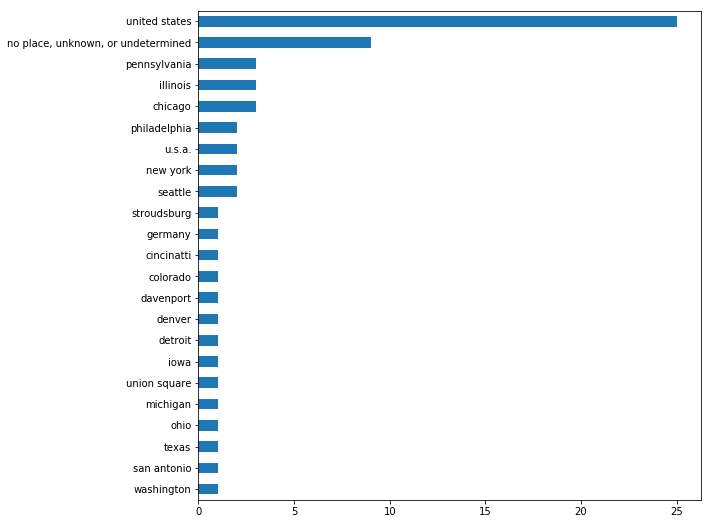

In [6]:
import pandas as pd
%matplotlib inline
from collections import Counter
location_counter = Counter()
wwi_sheet_music = requests.get("https://www.loc.gov/collections/world-war-i-sheet-music/?fo=json").json()

for item in wwi_sheet_music["results"]:
    if item['location'] is not None: #check that the item has a location, since it is optional
        for location in item['location']:
            location_counter[location] += 1 #add one for the location
    
locations = pd.Series(location_counter)
locations.sort_values(ascending=True).plot(kind='barh', figsize=(9,9))

## Further Research
Check out the "ask a librarian" section of our website: https://www.loc.gov/rr/askalib/